<a href="https://colab.research.google.com/github/christian235711/Method_spad_score/blob/main/spad_score_method_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix



In [ ]:
# option d'affichage des résultats
#pd.set_option("display.max_row",130)
pd.set_option("display.max_columns",100)

In [ ]:
colonnes =["IDENT","TypeHabi", "GeoFaz_Scl", "GeoFaz_cl","Anciennete","Doublon_ligne",
            "Revenus_iris","Sexe","Prenom_Phase_scl_H", "Prenom_Phase_scl_F","Prenom_Phase_cl_H",
           "Prenom_Phase_cl_F","Age_H","Age_F","Pays_sud","Prenom_effectif","codif_RdB","Flag_PA",
           "Annee_1er_don","Cumul_dons","Don_max","Don_moyen","Vingtiles_ISF","IFI+"]

In [ ]:
data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')

data_orig
data = data_orig.copy()
data

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
0,0000000101001347,03,75,07,08,03,03,03,64,46,06,04,09,04,02,03,03,02,07,07,06,04,10,2
1,0000000201001512,01,74,07,05,03,03,04,65,81,06,08,11,12,02,04,03,02,08,05,02,02,10,2
2,0000000301002801,02,32,03,07,02,04,04,66,66,06,06,11,09,02,03,03,02,08,07,05,03,07,2
3,0000000401003186,01,12,01,04,03,07,03,51,81,05,08,09,12,02,05,01,02,02,07,08,06,18,2
4,0000000501003624,02,12,01,06,03,03,03,51,81,05,08,09,12,02,05,01,02,08,07,08,06,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484517,0048451804239260,02,75,07,07,02,02,01,51,64,05,06,08,09,02,01,01,02,15,08,09,07,03,NaN
484518,0048451904239261,02,14,01,04,03,03,04,55,54,05,05,08,05,01,01,04,02,15,08,09,07,07,NaN
484519,0048452004239262,02,63,06,10,02,03,04,51,81,05,08,09,12,02,05,03,02,15,08,09,07,10,NaN
484520,0048452104239263,02,11,01,03,02,04,04,51,66,05,06,09,09,02,05,03,02,15,08,09,07,08,NaN


In [ ]:
data.describe()

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
count,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,484522,465453
unique,484522,4,38,8,11,3,8,5,31,45,7,8,12,12,2,6,5,2,9,8,9,7,21,2
top,0042866404169810,02,72,07,06,03,03,01,71,81,07,08,12,12,02,05,02,02,01,04,06,02,15,2
freq,1,300217,39822,172697,125150,305709,121212,169127,182654,230666,182654,230666,182655,230666,472877,204249,222173,462970,117524,105242,86778,109209,34764,462833


In [ ]:
# connaitre les individus dont on n'a pas d'information sur la variable
data.iloc[:,23].value_counts(dropna = False)


2      462833
NaN     19069
1        2620
Name: IFI+, dtype: int64

In [ ]:
(data.isnull()).sum(axis=0)

IDENT                     0
TypeHabi                  0
GeoFaz_Scl                0
GeoFaz_cl                 0
Anciennete                0
Doublon_ligne             0
Revenus_iris              0
Sexe                      0
Prenom_Phase_scl_H        0
Prenom_Phase_scl_F        0
Prenom_Phase_cl_H         0
Prenom_Phase_cl_F         0
Age_H                     0
Age_F                     0
Pays_sud                  0
Prenom_effectif           0
codif_RdB                 0
Flag_PA                   0
Annee_1er_don             0
Cumul_dons                0
Don_max                   0
Don_moyen                 0
Vingtiles_ISF             0
IFI+                  19069
dtype: int64

In [ ]:
(data.isnull()).sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
484517    1
484518    1
484519    1
484520    1
484521    1
Length: 484522, dtype: int64

In [ ]:
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

In [ ]:
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

C:\Users\Christian\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Christian\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
data_sans_nan

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
0,0000000101001347,3,75,7,8,3,3,3,64,46,6,4,9,4,2,3,3,2,7,7,6,4,10,2
1,0000000201001512,1,74,7,5,3,3,4,65,81,6,8,11,12,2,4,3,2,8,5,2,2,10,2
2,0000000301002801,2,32,3,7,2,4,4,66,66,6,6,11,9,2,3,3,2,8,7,5,3,7,2
3,0000000401003186,1,12,1,4,3,7,3,51,81,5,8,9,12,2,5,1,2,2,7,8,6,18,2
4,0000000501003624,2,12,1,6,3,3,3,51,81,5,8,9,12,2,5,1,2,8,7,8,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466512,0046651304217222,2,35,3,10,2,4,1,71,37,7,3,12,11,2,4,3,2,1,2,2,2,7,2
466513,0046651404217223,3,75,7,10,2,6,4,65,66,6,6,11,10,2,4,3,2,1,3,6,5,17,2
466514,0046651504217224,1,73,7,6,3,7,3,32,81,3,8,4,12,2,5,3,2,1,3,4,4,19,2
466515,0046651604217225,2,31,3,8,3,5,2,71,44,7,4,12,5,2,4,2,2,1,2,3,3,15,2


In [ ]:
data_sans_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465453 entries, 0 to 466516
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   IDENT               465453 non-null  object
 1   TypeHabi            465453 non-null  int32 
 2   GeoFaz_Scl          465453 non-null  int32 
 3   GeoFaz_cl           465453 non-null  int32 
 4   Anciennete          465453 non-null  int32 
 5   Doublon_ligne       465453 non-null  int32 
 6   Revenus_iris        465453 non-null  int32 
 7   Sexe                465453 non-null  int32 
 8   Prenom_Phase_scl_H  465453 non-null  int32 
 9   Prenom_Phase_scl_F  465453 non-null  int32 
 10  Prenom_Phase_cl_H   465453 non-null  int32 
 11  Prenom_Phase_cl_F   465453 non-null  int32 
 12  Age_H               465453 non-null  int32 
 13  Age_F               465453 non-null  int32 
 14  Pays_sud            465453 non-null  int32 
 15  Prenom_effectif     465453 non-null  int32 
 16  co

In [ ]:
data_sans_nan.describe()

,TypeHabi,GeoFaz_Scl,GeoFaz_cl,Anciennete,Doublon_ligne,Revenus_iris,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Pays_sud,Prenom_effectif,codif_RdB,Flag_PA,Annee_1er_don,Cumul_dons,Don_max,Don_moyen,Vingtiles_ISF,IFI+
count,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000,465453.000000
mean,1.869420,48.584830,4.533964,6.246605,2.605926,4.275798,2.536705,57.524141,68.414229,5.528803,6.530677,9.547428,9.864519,1.976184,4.103469,2.291338,1.953697,3.463510,3.610745,3.960802,3.232995,11.008207,1.994371
std,0.611073,22.762038,2.257467,2.267625,0.535912,1.690335,1.237929,14.446827,15.488192,1.477708,1.702904,2.771383,2.759177,0.152474,1.124122,0.859759,0.210141,2.310546,1.609919,2.199834,1.615739,5.260786,0.074815
min,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,3.000000,5.000000,2.000000,3.000000,1.000000,51.000000,64.000000,5.000000,6.000000,8.000000,8.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,7.000000,2.000000
50%,2.000000,43.000000,4.000000,6.000000,3.000000,4.000000,3.000000,65.000000,75.000000,6.000000,7.000000,11.000000,11.000000,2.000000,4.000000,2.000000,2.000000,3.000000,4.000000,4.000000,3.000000,11.000000,2.000000
75%,2.000000,72.000000,7.000000,8.000000,3.000000,6.000000,4.000000,71.000000,81.000000,7.000000,8.000000,12.000000,12.000000,2.000000,5.000000,3.000000,2.000000,5.000000,5.000000,6.000000,4.000000,16.000000,2.000000
max,4.000000,81.000000,8.000000,11.000000,3.000000,8.000000,5.000000,71.000000,81.000000,7.000000,8.000000,12.000000,12.000000,2.000000,6.000000,5.000000,2.000000,8.000000,8.000000,9.000000,7.000000,21.000000,2.000000


In [ ]:
data_sans_nan["IFI+"].value_counts(dropna=False)

2    462833
1      2620
Name: IFI+, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Transformation les variables en oneHot réel
def data_processing(matrice):
    for i in range(0,len(matrice.columns)):    
        matrice[matrice.columns[i]].fillna(100.0, inplace=True) #On remplace les données manquantes par 100
    for i in range(0,len(matrice.columns)):
        print(matrice[matrice.columns[i]].value_counts(dropna=False))    
    
   #Transformation de toutes les variables en facteurs         
    for i in range(0,len(matrice.columns)):
        matrice[matrice.columns[i]] = matrice[matrice.columns[i]].astype('category')
    return matrice.to_numpy() #.as_matrix()


In [ ]:
data = data_sans_nan

In [ ]:
# dataframe numpy en matrice
nb_var = data.shape[1] - 1
encodage = OneHotEncoder()  
encodage.fit(data_processing(data.iloc[:,1:nb_var]))  
train_X = (encodage.transform(data_processing(data.iloc[:,1:nb_var])).toarray()).astype('float32')
train_Y = np.asanyarray(data.iloc[:,nb_var]).astype('float32')
input_size = train_X.shape[1]

train_Y[train_Y == 2.] = 0. 

2    288200
1    119764
3     55993
4      1496
Name: TypeHabi, dtype: int64
72    38316
31    35701
75    30290
74    28153
73    25503
13    23731
76    22535
34    22480
63    22105
71    21450
37    21064
32    19759
43    18134
11    17718
64    13545
36    11794
12    10958
35    10656
25     9521
33     8908
61     7221
41     6683
14     6510
62     4132
15     3948
46     3463
22     2949
21     2802
81     2759
42     2496
24     2214
45     2009
23     1929
44     1478
51     1256
52     1007
53      213
54       63
Name: GeoFaz_Scl, dtype: int64
7    166247
3    130362
1     62865
6     47003
4     34263
2     19415
8      2759
5      2539
Name: GeoFaz_cl, dtype: int64
6     120189
7      90068
5      52999
10     49342
8      41346
4      35475
9      24791
1      24678
3      13387
2      12012
11      1166
Name: Anciennete, dtype: int64
3    293299
2    160885
1     11269
Name: Doublon_ligne, dtype: int64
3    116466
4    100627
7     62560
6     61489
5     55606
2     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier



from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, GridSearchCV, RandomizedSearchCV

def evaluation(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred)) 

    print(confusion_matrix(y_train, model.predict(X_train))) # ajouter 
    print(classification_report(y_train, model.predict(X_train) ))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = 'precision', train_sizes = np.linspace(0.1, 1, 10) )

    plt.figure(figsize = (10,6))
    plt.plot(N, train_score.mean(axis=1), label ="train_score")
    plt.plot(N, val_score.mean(axis=1), label ="cross_validation_score")

    plt.legend()

train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )



train_X = (encodage.transform(data_processing(train_set.iloc[:,1:nb_var])).toarray()).astype('float32')
train_Y = np.asanyarray(train_set.iloc[:,nb_var]).astype('float32')

test_X = (encodage.transform(data_processing(test_set.iloc[:,1:nb_var])).toarray()).astype('float32')
test_Y = np.asanyarray(test_set.iloc[:,nb_var]).astype('float32')


2    230420
1     95870
3     44868
4      1204
Name: TypeHabi, dtype: int64
72    30497
31    28606
75    24129
74    22617
73    20374
13    19056
76    18009
34    17938
63    17764
71    17264
37    16802
32    15818
43    14461
11    14197
64    10868
36     9452
12     8779
35     8558
25     7553
33     7161
61     5791
41     5371
14     5182
62     3314
15     3141
46     2763
22     2355
21     2242
81     2179
42     1994
24     1745
45     1633
23     1540
44     1186
51      987
52      810
53      174
54       52
Name: GeoFaz_Scl, dtype: int64
7    132890
3    104335
1     50355
6     37737
4     27408
2     15435
8      2179
5      2023
Name: GeoFaz_cl, dtype: int64
6     96038
7     72153
5     42498
10    39358
8     33103
4     28465
9     19753
1     19751
3     10711
2      9596
11      936
Name: Anciennete, dtype: int64
3    234758
2    128602
1      9002
Name: Doublon_ligne, dtype: int64
3    93006
4    80540
7    50187
6    49083
5    44604
2    42507
1     8834


In [ ]:
model_17 = LogisticRegression(random_state =0, max_iter= 1000 )
evaluation(model_17, train_X, train_Y, test_X, test_Y)

[[    0   498]
 [    1 92592]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       498
         2.0       0.99      1.00      1.00     92593

    accuracy                           0.99     93091
   macro avg       0.50      0.50      0.50     93091
weighted avg       0.99      0.99      0.99     93091

[[     4   2118]
 [     3 370237]]
              precision    recall  f1-score   support

         1.0       0.57      0.00      0.00      2122
         2.0       0.99      1.00      1.00    370240

    accuracy                           0.99    372362
   macro avg       0.78      0.50      0.50    372362
weighted avg       0.99      0.99      0.99    372362



C:\Users\Christian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: 

In [ ]:
def custom_metric(y, y_pred) :
    "on va pondérer les individus de manière à obtenir un bon classement (on inverse les poids)"
    somme = 0
    tot_0 =  len(y[y==0])
    tot_1 =  len(y[y==1]) 
    tot = len(y)
    for i in range(tot):
        if (y[i]==0) & (y_pred[i]==0) :
            #print("0")
            somme = somme + 1   # *(tot/tot_1 )
        # dans notre dataset, ce sont les individus appartenant à la classe 1 qui sont peu nombreux
        if (y[i]==1) & (y_pred[i]==1) : 
            #print("1")
            somme = somme + 1*tot_0/tot_1   # *(tot/tot_0)
        
    return somme/(tot_0*2)     # somme/(tot_0 + tot_1*(tot_0/tot_1) )    
#  somme/( (tot_1*tot/tot_0) + (tot_0*tot/tot_1 ) )





In [ ]:
custom_score = make_scorer(custom_metric, greater_is_better =True) 

NameError: name 'make_scorer' is not defined

In [ ]:

def evaluation_new_pond(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred)) 

    print(confusion_matrix(y_train, model.predict(X_train))) # ajouter 
    print(classification_report(y_train, model.predict(X_train) ))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = "recall", train_sizes = np.linspace(0.1, 1, 10) )

    plt.figure(figsize = (10,6))
    plt.plot(N, train_score.mean(axis=1), label ="train_score")
    plt.plot(N, val_score.mean(axis=1), label ="cross_validation_score")

    plt.legend()

train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )



train_X = (encodage.transform(data_processing(train_set.iloc[:,1:nb_var])).toarray()).astype('float32')
train_Y = np.asanyarray(train_set.iloc[:,nb_var]).astype('float32')

test_X = (encodage.transform(data_processing(test_set.iloc[:,1:nb_var])).toarray()).astype('float32')
test_Y = np.asanyarray(test_set.iloc[:,nb_var]).astype('float32')


2    230420
1     95870
3     44868
4      1204
Name: TypeHabi, dtype: int64
72    30497
31    28606
75    24129
74    22617
73    20374
13    19056
76    18009
34    17938
63    17764
71    17264
37    16802
32    15818
43    14461
11    14197
64    10868
36     9452
12     8779
35     8558
25     7553
33     7161
61     5791
41     5371
14     5182
62     3314
15     3141
46     2763
22     2355
21     2242
81     2179
42     1994
24     1745
45     1633
23     1540
44     1186
51      987
52      810
53      174
54       52
Name: GeoFaz_Scl, dtype: int64
7    132890
3    104335
1     50355
6     37737
4     27408
2     15435
8      2179
5      2023
Name: GeoFaz_cl, dtype: int64
6     96038
7     72153
5     42498
10    39358
8     33103
4     28465
9     19753
1     19751
3     10711
2      9596
11      936
Name: Anciennete, dtype: int64
3    234758
2    128602
1      9002
Name: Doublon_ligne, dtype: int64
3    93006
4    80540
7    50187
6    49083
5    44604
2    42507
1     8834


[[  417    81]
 [10020 82573]]
              precision    recall  f1-score   support

         1.0       0.04      0.84      0.08       498
         2.0       1.00      0.89      0.94     92593

    accuracy                           0.89     93091
   macro avg       0.52      0.86      0.51     93091
weighted avg       0.99      0.89      0.94     93091

[[  1821    301]
 [ 39903 330337]]
              precision    recall  f1-score   support

         1.0       0.04      0.86      0.08      2122
         2.0       1.00      0.89      0.94    370240

    accuracy                           0.89    372362
   macro avg       0.52      0.88      0.51    372362
weighted avg       0.99      0.89      0.94    372362



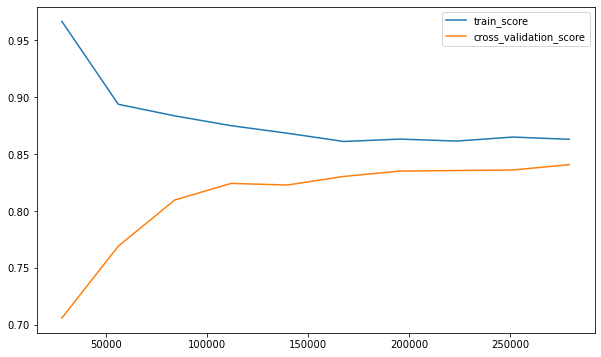

In [ ]:
model_17_cw = LogisticRegression(random_state =0, max_iter= 1000, class_weight="balanced")
evaluation_new_pond(model_17_cw, train_X, train_Y, test_X, test_Y)

In [ ]:
462833/465453 

0.9943710750602102

In [ ]:
2620/465453

0.005628924939789839

In [ ]:
462833/2620

176.65381679389313

In [ ]:
custom_metric(np.array([0,0,0,0,0,0,0,0,0,0,1]),np.array([1,1,1,1,1,1,0,0,0,0,1]))

0
0
0
0
1


0.7

In [ ]:
custom_metric(np.array([0,0,0,0,0,0,1]),np.array([0,0,0,0,1,1,1]))

0
0
0
0
1


0.8333333333333334